In [69]:
import pandas_datareader.data as web
import pandas as pd
import datetime 
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
%matplotlib inline

In [2]:
today = date.today()
today

datetime.date(2020, 6, 29)

In [3]:

start = datetime.datetime(2012,1,1)
end = today

In [4]:
amazon = web.DataReader("AMZN", 'yahoo', start, end)

In [5]:
#if you want to import as csv
amazon.to_csv('Amazon.csv')

In [6]:
#reading csv
am = pd.read_csv('Amazon.csv')

In [7]:
#checking if we have the same dataset as amazon.head()
am.head() 

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
1,2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2,2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
3,2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
4,2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998


In [8]:
#checking if we have the same dataset as am.head()
amazon.head() 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998


In [9]:
am.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2136.000000,2136.000000,2136.000000,2136.000000,2.136000e+03,2136.000000
mean,891.813977,873.246040,883.019420,883.034588,4.086646e+06,883.034588
std,660.815862,646.447716,653.978635,654.016994,2.293480e+06,654.016994
min,178.250000,172.000000,173.809998,175.929993,8.813000e+05,175.929993
25%,316.897491,310.727501,314.007507,313.132492,2.669650e+06,313.132492
50%,674.390015,659.290009,665.575012,664.649994,3.476050e+06,664.649994
75%,1584.832550,1545.562531,1565.602478,1571.780029,4.736300e+06,1571.780029
max,2796.000000,2721.000000,2780.000000,2764.409912,2.385610e+07,2764.409912


In [10]:
amazon.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2136.000000,2136.000000,2136.000000,2136.000000,2.136000e+03,2136.000000
mean,891.813977,873.246040,883.019420,883.034588,4.086646e+06,883.034588
std,660.815862,646.447716,653.978635,654.016994,2.293480e+06,654.016994
min,178.250000,172.000000,173.809998,175.929993,8.813000e+05,175.929993
25%,316.897491,310.727501,314.007507,313.132492,2.669650e+06,313.132492
50%,674.390015,659.290009,665.575012,664.649994,3.476050e+06,664.649994
75%,1584.832550,1545.562531,1565.602478,1571.780029,4.736300e+06,1571.780029
max,2796.000000,2721.000000,2780.000000,2764.409912,2.385610e+07,2764.409912


In [11]:
# Select only the important features i.e. the date and price
am = am[["Date","Close"]]
am.head()

,Date,Close
0,2012-01-03,179.029999
1,2012-01-04,177.509995
2,2012-01-05,177.610001
3,2012-01-06,182.610001
4,2012-01-09,178.559998


In [19]:
# Select only the important features i.e. the date and price
#amazon = amazon[["Date","Close"]]
#amazon.head()

pandas.core.frame.DataFrame

In [20]:
type(amazon)

pandas.core.frame.DataFrame

In [21]:
type(am)

pandas.core.frame.DataFrame

In [12]:
# Rename the features: These names are NEEDED for the model fitting
am = am.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset

In [13]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(am) # fit the model using all data

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


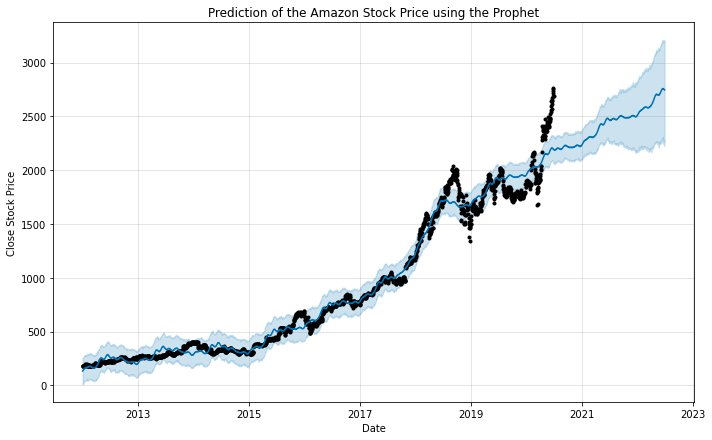

In [14]:
future = m.make_future_dataframe(periods=730) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Amazon Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

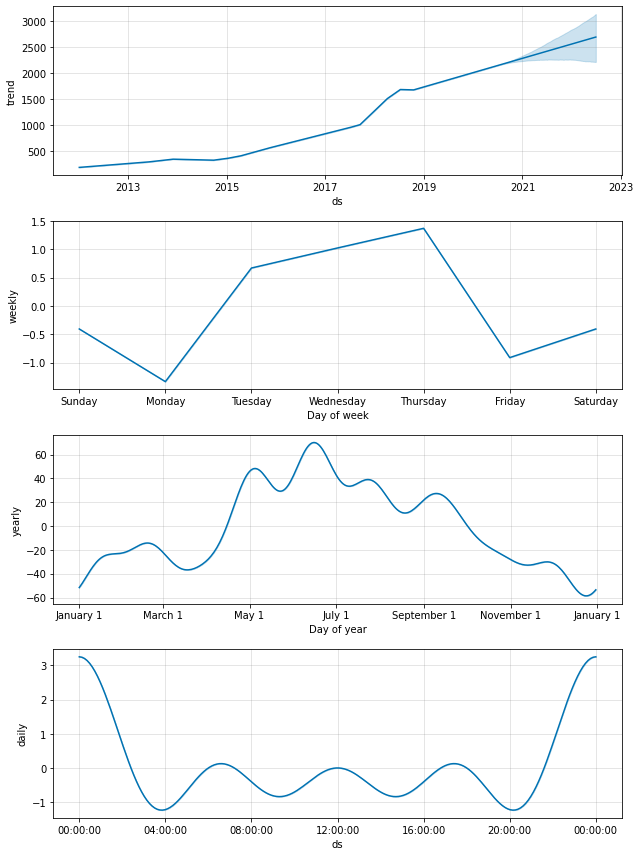

In [15]:
m.plot_components(prediction)
plt.show()

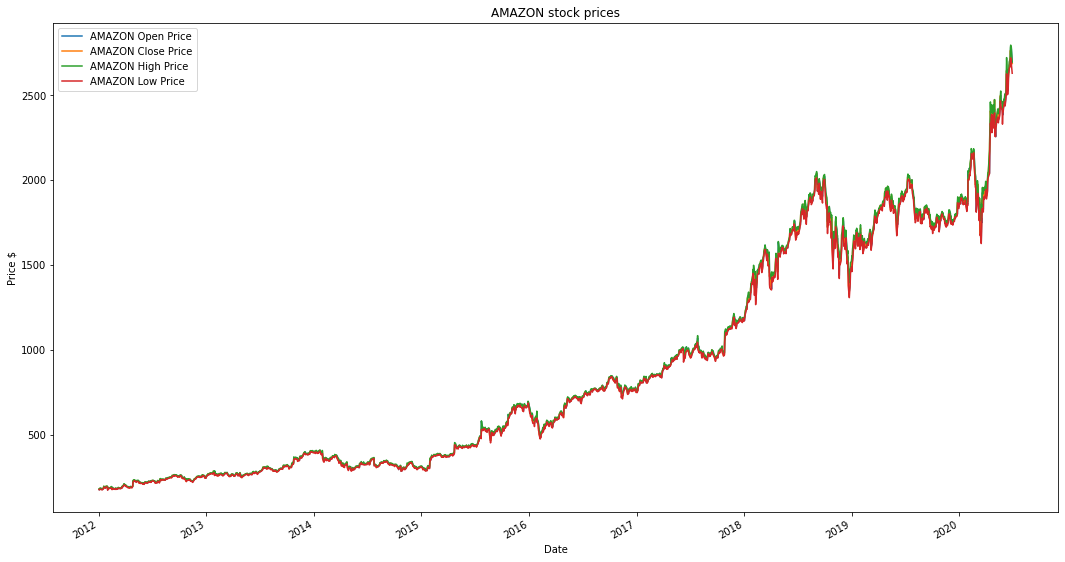

In [44]:
amazon['Open'].plot(label="AMAZON Open Price", figsize=(18,10))
amazon['Close'].plot(label="AMAZON Close Price")
amazon['High'].plot(label="AMAZON High Price")
amazon['Low'].plot(label="AMAZON Low Price")
plt.title("AMAZON stock prices")
plt.ylabel("Price $")
plt.legend()
plt.show()

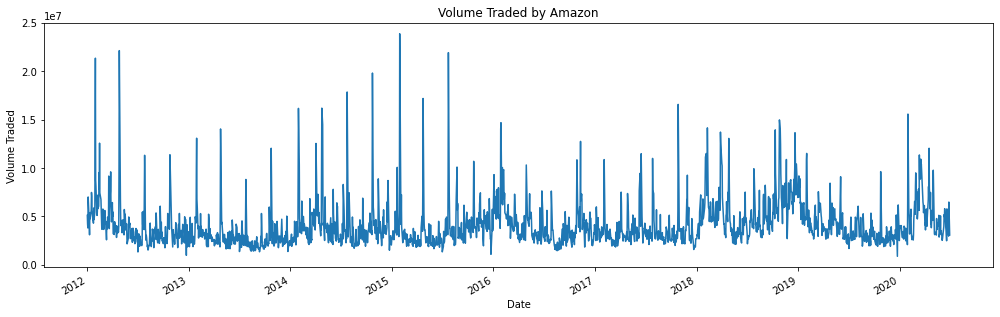

In [43]:
amazon['Volume'].plot(figsize=(17,5))
plt.title('Volume Traded by Amazon')
plt.ylabel('Volume Traded')
plt.show()

In [47]:
amazon.iloc[amazon['Volume'].argmax()]

High         3.595000e+02
Low          3.407400e+02
Open         3.463200e+02
Close        3.545300e+02
Volume       2.385610e+07
Adj Close    3.545300e+02
Name: 2015-01-30 00:00:00, dtype: float64

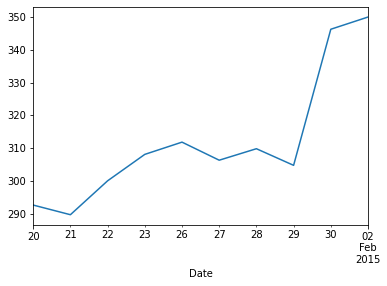

In [61]:
amazon.iloc[765:775]['Open'].plot()

In [63]:
amazon['Total Traded'] = amazon['Open']*amazon['Volume']

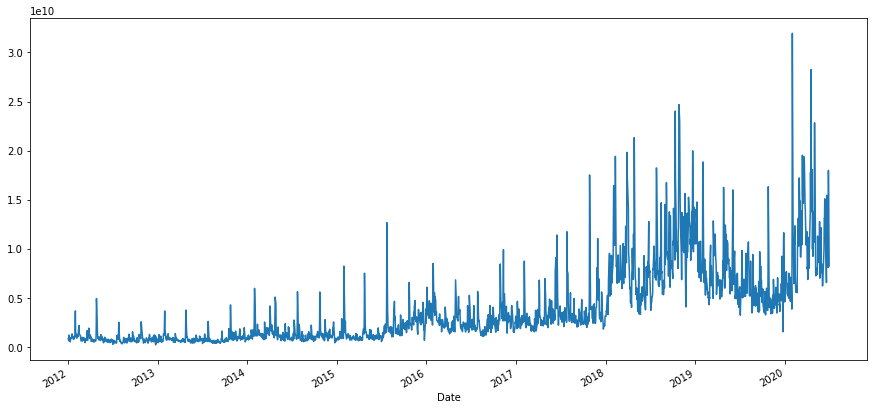

In [68]:
amazon['Total Traded'].plot(figsize=(15,7))
plt.show()